**Load the full data into memory.** 

Pandas reads the columns of the csv file and determines it's datatype. The data was loaded to view which attributes were represented as continuous or categorical data types, the non-null counts and column names. From initial description of the dataframe it was observed that there were missing values as the number of non-null counts did not match for all the attributes.

In [1]:
import pandas as pd

# read data 
df = pd.read_csv('loan-data.csv', delimiter=";", encoding='utf8', encoding_errors='ignore', low_memory=False)

# get a description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   issue_d              9500 non-null   object 
 2   loan_amnt            9500 non-null   float64
 3   loan_status          9500 non-null   object 
 4   funded_amnt          9500 non-null   float64
 5   term                 9500 non-null   object 
 6   int_rate             9500 non-null   float64
 7   installment          9500 non-null   float64
 8   grade                9485 non-null   object 
 9   sub_grade            9486 non-null   object 
 10  verification_status  9500 non-null   object 
 11  url                  10000 non-null  object 
 12  addr_state           9500 non-null   object 
 13  total_pymnt          9500 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


To get a priliminary understanding of the values each attributed can assume, all the attribute values for the first few rows were displayed.

In [2]:
# display the first five rows of the dataframe
with pd.option_context('display.max_columns', None):
  display(df.head())

,id,issue_d,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,sub_grade,verification_status,url,addr_state,total_pymnt
0,48010226,May-15,35000.0,Current,35000.0,36 months,13.33,1184.86,C,C3,Verified,https://www.lendingclub.com/browse/loanDetail....,CA,9452.96
1,57693261,NaN,30000.0,Current,30000.0,36 months,0.89,938.57,A,A5,Source Verified,https://www.lendingclub.com/browse/loanDetail....,NY,4679.70
2,59432726,Sep-15,15000.0,Current,15000.0,36 months,0.53,494.86,B,B5,Verified,https://www.lendingclub.com/browse/loanDetail....,PA,1969.83
3,53222800,Jul-15,9600.0,Current,9600.0,36 months,0.89,300.35,A,A5,Not Verified,https://www.lendingclub.com/browse/loanDetail....,OH,1793.68
4,57803010,Aug-15,8075.0,Current,8075.0,36 months,19.19,296.78,NaN,E3,Source Verified,https://www.lendingclub.com/browse/loanDetail....,TX,1178.51


**For continuous features** 

Continuous attributes assume real values. To get an understanding of the continuous features in the dataframe, the percentage of missing values, cardinality and measures of central tendency (min, 1st quartile, median, mean, 3rd quartile, max, standard deviation) were calculated.

In [3]:
def buildContinuousFeaturesReport(features, data_df):
    conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.',
            'Mean', 'Median', '3rd Qrt', 'Max', 'Std. Dev.']

    conOut_df = pd.DataFrame(index=features, columns=conHead)
    columns_df = data_df[features]

    #COUNT
    conOut_df[conHead[0]] = len(columns_df)

    #MISS % 
    conOut_df[conHead[1]] = columns_df.isna().sum() / len(columns_df) * 100

    #CARDINALITY
    conOut_df[conHead[2]] = columns_df.nunique()

    #MINIMUM
    conOut_df[conHead[3]] = columns_df.min()

    #1ST QUARTILE
    conOut_df[conHead[4]] = columns_df.quantile(0.25)

    #MEAN
    conOut_df[conHead[5]] = columns_df.mean()

    #MEDIAN
    conOut_df[conHead[6]] = columns_df.median()

    #3rd QUARTILE
    conOut_df[conHead[7]] = columns_df.quantile(0.75)

    #MAX
    conOut_df[conHead[8]] = columns_df.max()

    #STANDARD DEVIATION
    conOut_df[conHead[9]] = columns_df.std()

    return conOut_df

with pd.option_context('display.float_format', '{:.2f}'.format):
  display(buildContinuousFeaturesReport(df.select_dtypes('number').columns.to_list(), df))

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
id,10000,0.00,10000,373332.00,46285035.75,54015809.19,55423144.00,61842636.50,68616519.00,9416984.59
loan_amnt,10000,5.00,885,1000.00,8743.75,15273.46,14000.00,20000.00,35000.00,8527.23
funded_amnt,10000,5.00,889,1000.00,8800.00,15311.04,14000.00,20000.00,35000.00,8531.99
int_rate,10000,5.00,92,0.17,0.49,7.52,0.99,15.61,28.99,8.18
installment,10000,5.00,4338,30.00,267.22,440.88,385.33,575.97,1372.97,241.38
total_pymnt,10000,5.00,8224,0.00,889.59,3143.85,1973.70,3765.25,41913.62,4222.35


**For Categorical feature**

Categorical feature values assume different levels or categories that are mutually exclusive. To understand statistics about the categorical attributes, percentage of missing values, cardinality, 1st and 2nd mode, frequency and percentage of 1st and 2nd mode were calculated.

In [4]:
def buildCategoricalFeaturesReport(features, data_df):
    catHead = ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq',
            'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']

    columns_df = data_df[features]

    #preparing a dictionary for storing data
    stats_dict = {k: ['']*len(features) for k in catHead}

    #CARDINALITY
    stats_dict['Card.'] = columns_df.nunique()

    missing = columns_df.isna().sum() / len(columns_df) * 100

    for col in columns_df:
        values = columns_df[col].value_counts()
        index = features.index(col)

        #COUNT
        stats_dict['Count'][index] = len(columns_df)

        #MISS %
        stats_dict['Miss %'][index] = missing[col]

        #MODES
        mode = values.index[0]
        mode2 = values.index[1] if len(values.index) > 1 else mode
        stats_dict['Mode'][index] = mode
        stats_dict['2nd Mode'][index] = mode2

        #MODE FREQ
        modeCount = values.loc[mode]
        modeCount2 = values.loc[mode2]
        stats_dict['Mode Freq'][index] = modeCount
        stats_dict['2nd Mode Freq'][index] = modeCount2

        #MODE %
        miss = stats_dict['Miss %'][index]


        modePer = (modeCount/(len(columns_df)*((100-miss)/100)))*100
        stats_dict['Mode %'][index] = round(modePer, 2)

        modePer2 = (modeCount2/(len(columns_df)*((100-miss)/100)))*100
        stats_dict['2nd Mode %'][index] = round(modePer2, 2)

    output_df = pd.DataFrame.from_dict(stats_dict)
    return output_df

with pd.option_context('display.max_rows', None, 'display.max_columns', None), pd.option_context('display.float_format', '{:.2f}'.format):
    display(buildCategoricalFeaturesReport(df.select_dtypes(include='object').columns.to_list(), df))

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
issue_d,10000,5.00,12,Oct-15,1095,11.53,Jul-15,1061,11.17
loan_status,10000,5.00,8,Current,8538,89.87,Fully Paid,505,5.32
term,10000,5.00,2,36 months,6281,66.12,60 months,3219,33.88
grade,10000,5.15,7,C,2766,29.16,B,2606,27.47
sub_grade,10000,5.14,35,C1,629,6.63,C3,586,6.18
verification_status,10000,5.00,3,Source Verified,4116,43.33,Verified,2711,28.54
url,10000,0.00,10000,https://www.lendingclub.com/browse/loanDetail....,1,0.01,https://www.lendingclub.com/browse/loanDetail....,1,0.01
addr_state,10000,5.00,49,CA,1336,14.06,NY,777,8.18


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>],
       [<AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'total_pymnt'}>]], dtype=object)

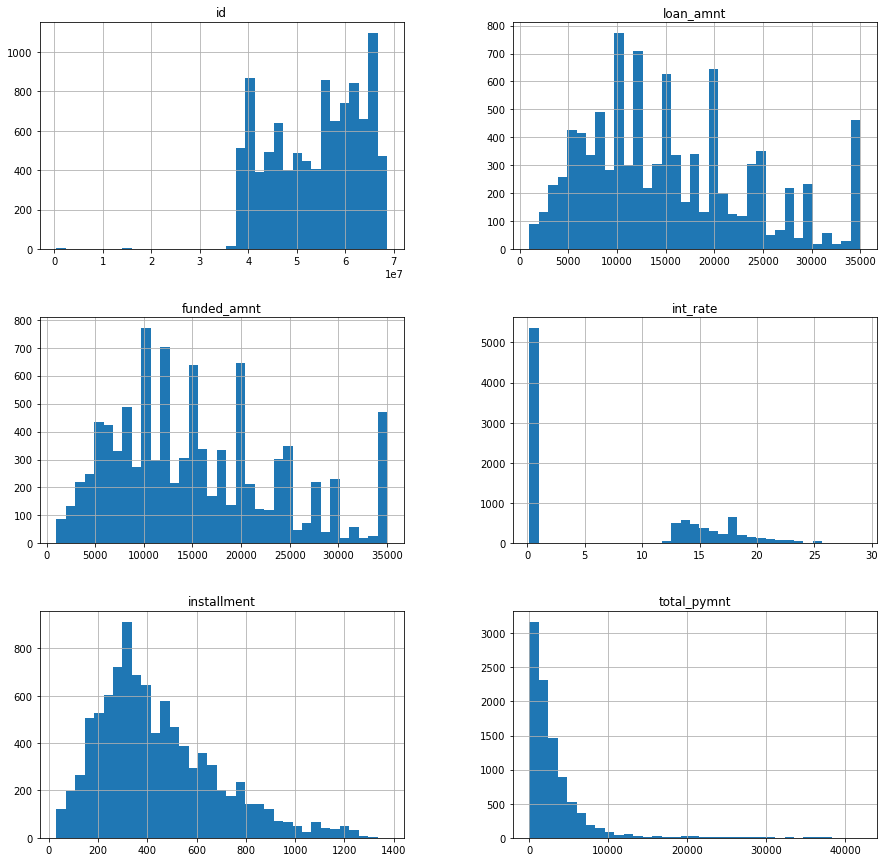

In [5]:
# generate histograms for continuous attributes
df.select_dtypes('number').hist(figsize=(15, 15), bins=35, layout=(3,2))

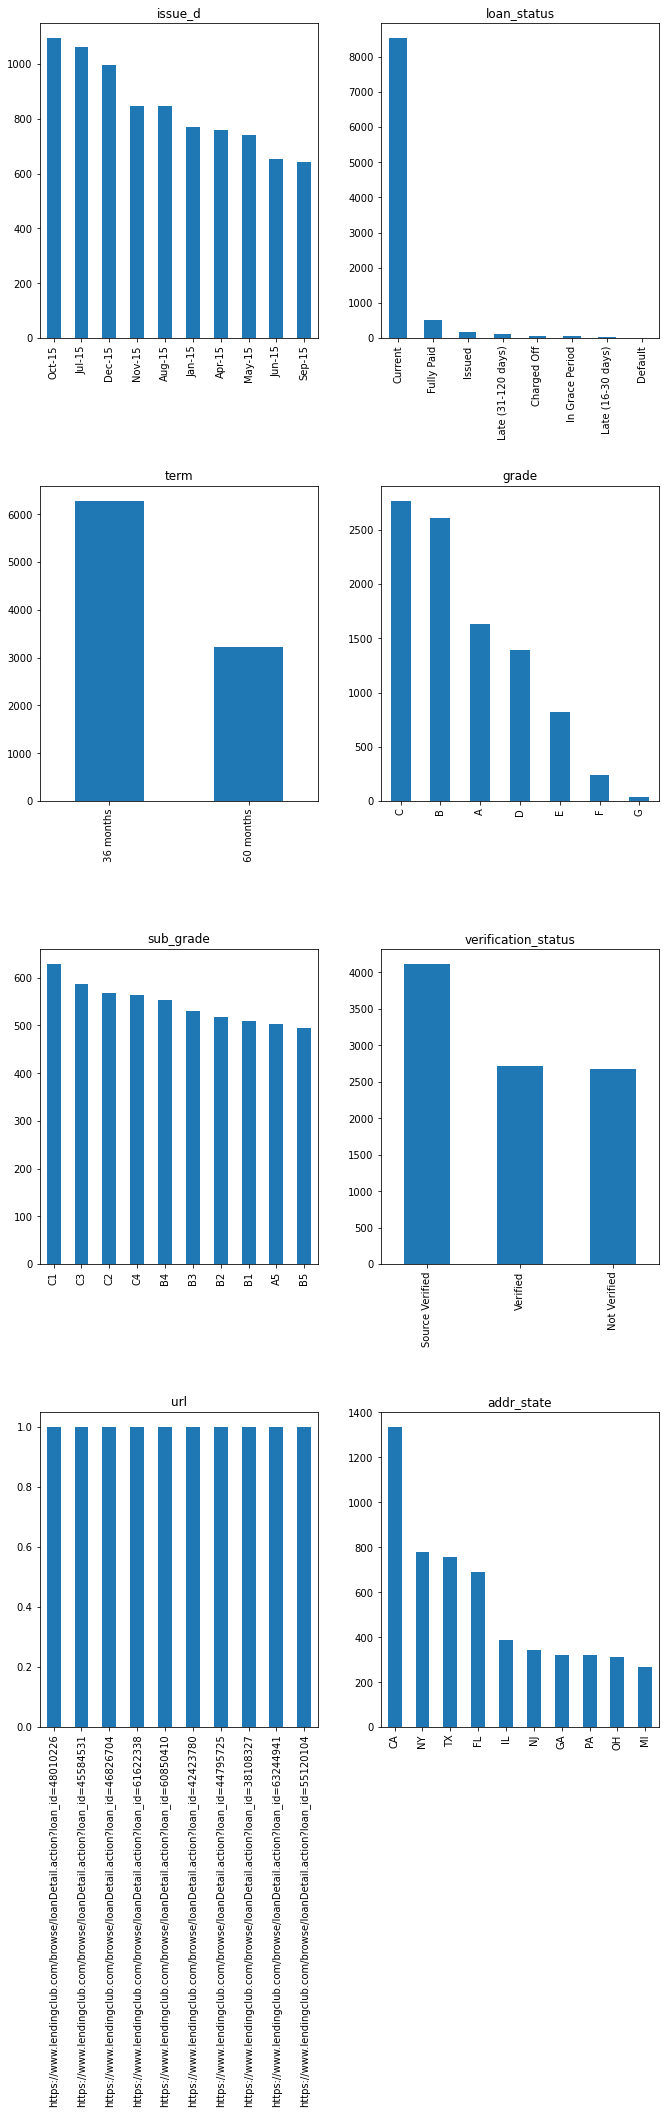

In [6]:
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

categoricalColumnsList = df.select_dtypes(include='object').columns.to_list()
barPlotRows = math.ceil(len(categoricalColumnsList) / 2)

for index, col in enumerate(df[categoricalColumnsList]):
    plt.subplot(barPlotRows, 2, index + 1)
    plt.tight_layout(pad=3.0)
    df[col].value_counts()[0:10].plot.bar(figsize=(10, 30), title=categoricalColumnsList[index])

**Observing patterns in missing values**

The missing values were visualized for all features to look for patterns. For example: if the same person or id has missing data for multiple features or if the same feature value is missing for many records or some features are missing values for the same records. No such patterns were observed.

<AxesSubplot:>

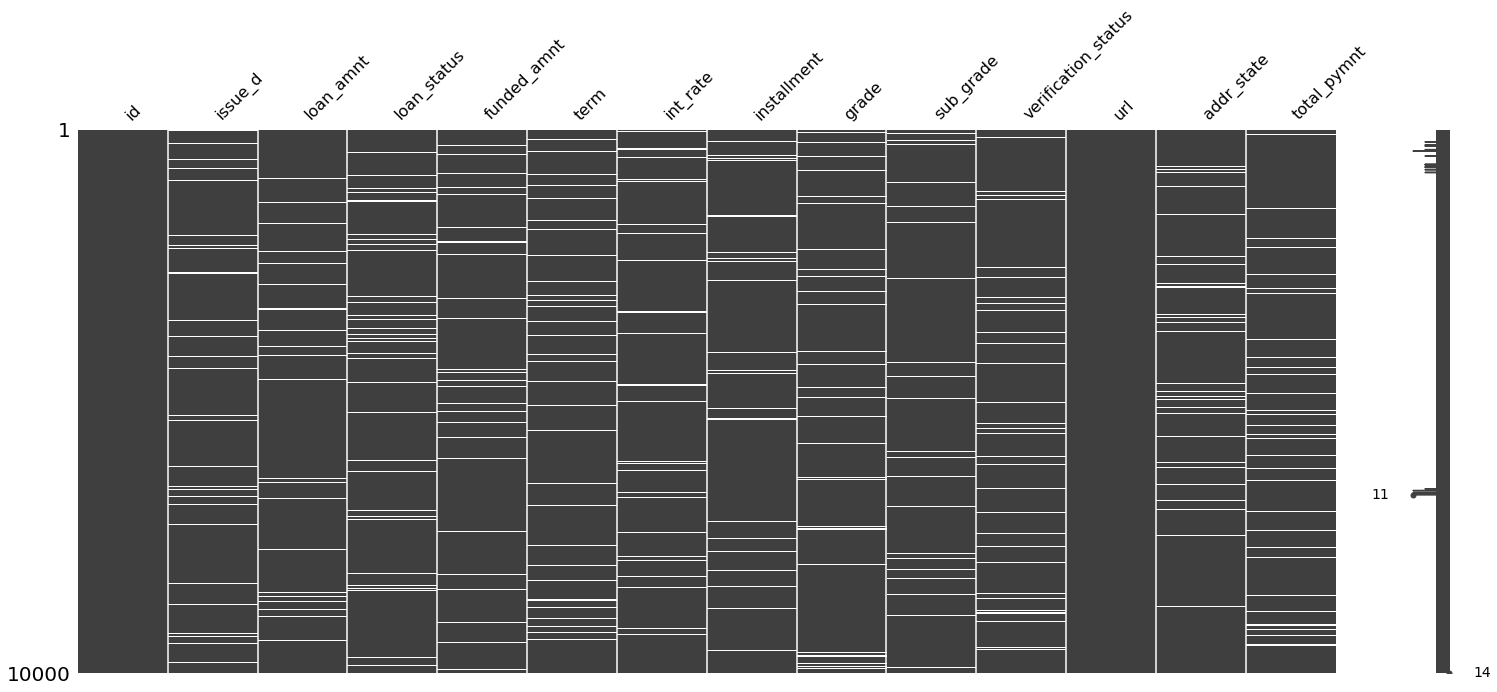

In [7]:
import missingno as msno
msno.matrix(df)

In [8]:
df_col_dropped = df.drop(columns=['id', 'url', 'addr_state', 'sub_grade'])

In [9]:
df_col_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   issue_d              9500 non-null   object 
 1   loan_amnt            9500 non-null   float64
 2   loan_status          9500 non-null   object 
 3   funded_amnt          9500 non-null   float64
 4   term                 9500 non-null   object 
 5   int_rate             9500 non-null   float64
 6   installment          9500 non-null   float64
 7   grade                9485 non-null   object 
 8   verification_status  9500 non-null   object 
 9   total_pymnt          9500 non-null   float64
dtypes: float64(5), object(5)
memory usage: 781.4+ KB


In [10]:
values = {"issue_d": "Oct-15",
          "loan_status": "Default", "term": "36 months", "grade": "G", "sub_grade": "G5", 
          "verification_status": "Not Verified", "addr_state": "0",
          "loan_amnt": 15273.46, "funded_amnt": 15311.04, "int_rate": 0.99, "installment": 440.88, 
          "total_pymnt": 1973.70 }
df_missingfx = df_col_dropped.fillna(value = values)

In [11]:
df_missingfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   issue_d              10000 non-null  object 
 1   loan_amnt            10000 non-null  float64
 2   loan_status          10000 non-null  object 
 3   funded_amnt          10000 non-null  float64
 4   term                 10000 non-null  object 
 5   int_rate             10000 non-null  float64
 6   installment          10000 non-null  float64
 7   grade                10000 non-null  object 
 8   verification_status  10000 non-null  object 
 9   total_pymnt          10000 non-null  float64
dtypes: float64(5), object(5)
memory usage: 781.4+ KB


In [12]:
# Encode features using label encoding
df_transformed = df_missingfx.replace({"issue_d": {"Jan-15":1,"Feb-15":2,"Mar-15":3,"Apr-15":4,"May-15":5,"Jun-15":6,
                                                   "Jul-15":7,"Aug-15":8,"Sep-15":9,"Oct-15":10,"Nov-15":11,"Dec-15":12},
                            "loan_status":{"Current": 1, "Fully Paid": 1, "Issued": 0, "Late (31-120 days)": 0,
                             "Charged Off": 0, "In Grace Period": 0, "Late (16-30 days)": 0, "Default": 0},
                             "term":{"36 months": 1," 36 months": 1, "60 months": 0, " 60 months": 0}, 
                           "grade" :{"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}, 
                           "verification_status": {"Source Verified": 1, "Verified": 1, "Not Verified": 0}
                             })

In [13]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   issue_d              10000 non-null  int64  
 1   loan_amnt            10000 non-null  float64
 2   loan_status          10000 non-null  int64  
 3   funded_amnt          10000 non-null  float64
 4   term                 10000 non-null  int64  
 5   int_rate             10000 non-null  float64
 6   installment          10000 non-null  float64
 7   grade                10000 non-null  int64  
 8   verification_status  10000 non-null  int64  
 9   total_pymnt          10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


In [14]:
# change usd to eur
# read exchange rate data 
df_exchng = pd.read_csv('EUR-USD.csv')
df_exchng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12 non-null     float64
 1   High    12 non-null     float64
 2   Low     12 non-null     float64
 3   Close   12 non-null     float64
 4   Volume  12 non-null     int64  
 5   avg     12 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 704.0 bytes


In [21]:
df_transformed["ex_rates"] = df_transformed["issue_d"].transform(lambda x: df_exchng["avg"][x - 1])

df_transformed["loan_amnt"] = df_transformed["ex_rates"] * df_transformed["loan_amnt"]
df_transformed["funded_amnt"] = df_transformed["ex_rates"] * df_transformed["funded_amnt"]
df_transformed["installment"] = df_transformed["ex_rates"] * df_transformed["installment"]
df_transformed["total_pymnt"] = df_transformed["ex_rates"] * df_transformed["total_pymnt"]

In [22]:
# display the first five rows of the dataframe
with pd.option_context('display.max_columns', None):
  display(df_transformed.head())

,issue_d,loan_amnt,loan_status,funded_amnt,term,int_rate,installment,grade,verification_status,total_pymnt,ex_rates
0,5,38981.326510,1,38981.326510,1,13.33,1319.640415,3,1,10528.254864,1.113752
1,10,33606.305130,1,33606.305130,1,0.89,1051.395660,1,1,5242.247537,1.120210
2,9,16912.274655,1,16912.274655,1,0.53,557.947216,2,1,2220.953732,1.127485
3,7,10575.695798,1,10575.695798,1,0.89,330.876066,1,0,1975.980629,1.101635
4,8,9107.107151,1,9107.107151,1,19.19,334.712973,7,1,1329.141405,1.127815


**Build feature correlation heatmap**

To understand the linear correlation among the continuous features, a pearson's feature correlation heatmap was developed.

<AxesSubplot:>

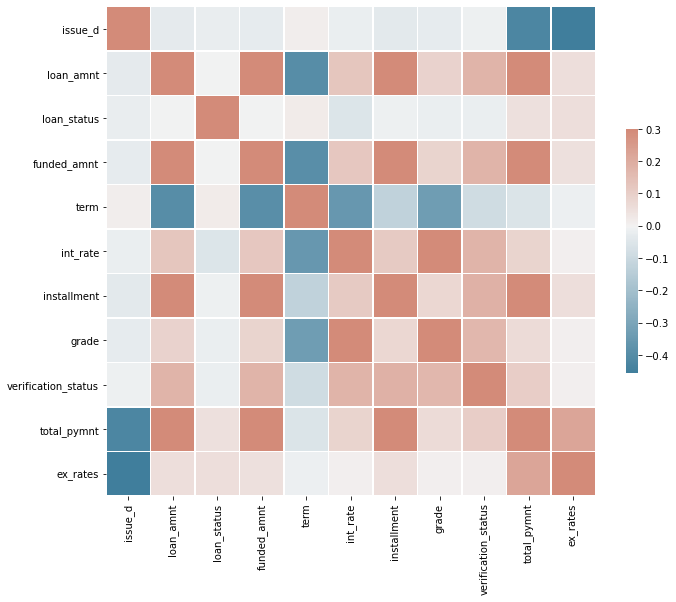

In [23]:
# feature correlation matrix
import seaborn as sns
featureCorrelationMatrix = df_transformed.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(11, 9))
sns.heatmap(featureCorrelationMatrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})